# 분류 실습

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np


from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.font_manager as fm

# 폰트 위치 
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

# 폰트 지정
font_location = 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'  
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font', family = font_name)

설정 파일 위치:  C:\Users\won\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
1025


In [4]:
df = pd.read_csv('Ashopping_ddd.csv', encoding = 'cp949')
df['명품_구매유형']=np.where(df['구매유형'] == 4 ,1,0)
df.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기,명품_구매유형
0,1,1,4963160,1,22,225598,1,5445,1,3,...,6,1,6,3303,0,3,2,1,149,0
1,2,1,2271520,0,38,59777,22,350995,1,1,...,4,0,2,3129,0,5,3,4,81,0
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,6,0,3,3636,0,4,1,4,1817,0
3,4,1,2778850,0,9,308761,1,5195,2,4,...,5,0,4,3637,0,7,4,6,403,1
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,0,4,3638,0,5,1,4,363,1


In [121]:
df.groupby(by ='고객 나이대')['명품_구매유형'].sum()

고객 나이대
2     27
3     54
4    198
5     20
6     20
7      8
8      1
Name: 명품_구매유형, dtype: int32

In [122]:
df.groupby(by ='거주지역')['명품_구매유형'].sum()

거주지역
1      0
2      7
3     23
4     36
5    176
6     56
7     30
Name: 명품_구매유형, dtype: int32

In [155]:
df['거주지역_5'] = np.where(df['거주지역'] == 5 , 1, 0)

df['고객 나이대_4'] = np.where(df['고객 나이대'] == 4 , 1, 0)


In [100]:
df.groupby(by='명품_구매유형')[['총매출액', '1회 평균매출액']].describe()

총매출액                                                               \
         count          mean           std        min        25%        50%   
명품_구매유형                                                                       
0        635.0  5.725006e+06  5.491005e+06  1886100.0  2749675.0  4002100.0   
1        365.0  6.089410e+06  6.335066e+06  1911390.0  2979800.0  4295100.0   

                               1회 평균매출액                                \
               75%         max    count           mean            std   
명품_구매유형                                                                 
0        6484715.0  61777090.0    635.0  316848.466142  288215.808354   
1        6570370.0  67595760.0    365.0  413434.484932  342535.559964   

                                                           
             min       25%       50%       75%        max  
명품_구매유형                                                    
0        27082.0  148235.5  235592.0  380811.5  2798500.0  
1        38633.0  194077.0  304357.0  509070.0  2680100.0

In [118]:
df.sort_values(by = ['구매유형', '1회 평균매출액'], ascending =False).head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기,명품_구매유형
369,6,1,10720400,2,4,2680100,20,348145,2,4,...,5,0,3,3639,1,7,1,7,908.750000,1
384,9,1,9759800,2,6,1626633,17,364895,2,4,...,6,0,4,1940,1,7,1,7,322.333333,1
489,24,1,6179500,1,4,1544875,11,296450,2,4,...,6,0,6,3657,0,7,1,6,913.250000,1
325,295,1,19361400,2,13,1489338,20,347895,2,4,...,5,1,3,827,1,7,1,7,62.615385,1
60,854,0,7201100,1,5,1440220,24,360695,2,4,...,5,0,4,4487,1,7,1,7,896.400000,1


In [117]:
df.groupby(by='구매유형')[['총매출액', '1회 평균매출액']].sum()

,총매출액,1회 평균매출액
구매유형,,
1,771158750,47735540
2,2296624090,135599255
3,936393600,62812826
4,1853836890,105954742


In [123]:
df['명품_구매유형'].value_counts()

0    672
1    328
Name: 명품_구매유형, dtype: int64

변수 선택

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 변수 선택
X = df[['총매출액', '거래기간', '방문빈도']]
y = df['이탈여부']


# 학습 데이터셋, 검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 표준화 
scaler = StandardScaler()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)
print(X_train)


Index(['총매출액', '1회 평균매출액', '총 할인 금액', '거주지역', '고객 나이대', '거래기간', '평균 구매주기'], dtype='object')

# 보팅 분류기

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#df= pd.read_csv('Ashopping.csv', encoding ='cp949')

df['명품_구매유형'] = np.where(df['구매유형'] == 4 ,1,0)

# 변수 선택
X = df[['총매출액', '1회 평균매출액', '총 할인 금액', '거래기간', '평균 구매주기', '거주지역', '고객 나이대']]
#X = df.drop(['고객ID', '구매유형', '명품_구매유형'], axis = 1)
y = df['명품_구매유형']

# 학습 데이터셋, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 전처리 
ct = ColumnTransformer([("scaling", StandardScaler(), ['총매출액', '1회 평균매출액', '총 할인 금액', '거래기간', '평균 구매주기']),
                        ("onehot", OneHotEncoder(sparse = False, handle_unknown = 'ignore'),[ '거주지역', '고객 나이대'])])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
X_test




array([[ 0.6050611 ,  0.87734313,  0.52039092, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09282093,  1.25337915,  0.6181886 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.41099373,  4.18601753,  0.8044049 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.34698455, -0.42053352,  0.67190908, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08203256, -0.39502298, -2.47210367, ...,  1.        ,
         0.        ,  0.        ],
       [-0.66324377, -0.74051505,  0.80004562, ...,  0.        ,
         0.        ,  0.        ]])

In [153]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=5)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)
#print(X_test.shape)

In [154]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#lda = LinearDiscriminantAnalysis(n_components=3)
#lda.fit(X_train, y_train)
#X_train = lda.transform(X_train)
#X_test = lda.transform(X_test)
#print(X_test.shape)

In [125]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [126]:

# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )


# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.7500
LogisticRegression 정확도: 0.7533
KNeighborsClassifier 정확도: 0.7400


C:\Users\won\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\won\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
from sklearn.metrics import classification_report

y_pred =  vo_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       205
           1       0.64      0.48      0.55        95

    accuracy                           0.75       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.74      0.75      0.74       300



단일 의사결정나무

In [210]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0,  max_depth= 8, min_samples_leaf= 8, min_samples_split= 8)
model.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("평가용 데이터 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))


학습용 데이터 세트 정확도: 0.851
평가용 데이터 세트 정확도: 0.727


# 랜덤 포레스트

In [128]:
# 변수 선택
X = df[['총매출액', '1회 평균매출액', '총 할인 금액', '거주지역', '고객 나이대', '거래기간', '평균 구매주기']]
#X = df.drop(['고객ID', '구매유형', '명품_구매유형'], axis = 1)
y = df['명품_구매유형']

# 학습 데이터셋, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [129]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0,n_estimators= 3000, max_depth = 5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [130]:
print("학습용 데이터 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("평가용 데이터 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.837
평가용 데이터 세트 정확도: 0.730


변수 중요도

In [113]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.font_manager as fm

# 폰트 위치 
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

# 폰트 지정
font_location = 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'  
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font', family = font_name)

설정 파일 위치:  C:\Users\won\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
1083


In [282]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기,명품_구매유형
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.809000,...,5.147000,0.189000,3.965000,3495.891000,0.400000,6.489000,1.990000,4.085000,266.880824,0.383000
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.075954,...,1.169084,0.391705,1.082103,965.966194,0.490143,1.445672,1.519938,1.946166,254.077398,0.486362
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645,0.000000
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,4.000000,0.000000,3.000000,2871.000000,0.000000,7.000000,1.000000,2.000000,111.957671,0.000000
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,3.000000,...,5.000000,0.000000,4.000000,3836.000000,0.000000,7.000000,1.000000,4.000000,191.469697,0.000000
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,2.000000,6.000000,324.386218,1.000000
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,7.000000,1.000000,8.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000,1.000000


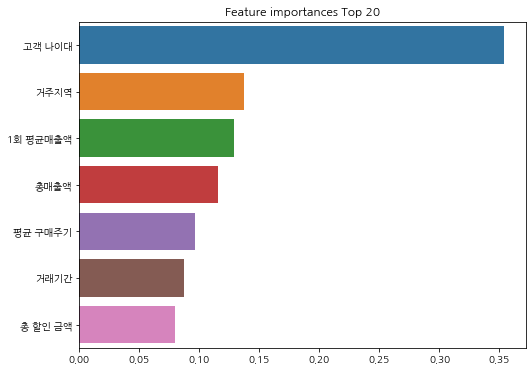

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Feature_importances_values = model.feature_importances_
Feature_importances = pd.Series(Feature_importances_values, index = X.columns)
Feature_top20 = Feature_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = Feature_top20, y = Feature_top20.index)
plt.show()



그리드 서치

In [38]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100],
         'max_depth' : [6,8,10,12],
         'min_samples_leaf' : [8,12,18],
          'min_samples_split' : [8, 16, 20]}
# 랜덤 포레스트 객체 생성 후 그리드서치 수행
grid_model = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(grid_model, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 마라미터\n', grid_cv.best_params_ )

print('최고 예측 정확도 : {0:.3f}'.format(grid_cv.best_score_) )

최적 하이퍼 마라미터
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.602


In [55]:
from sklearn.linear_model import LogisticRegression
# 모델의 객체 생성 
model = LogisticRegression(C = 0.01 ,random_state=1)
# 모델 학습
model.fit(X_train, y_train)

print("학습 데이터셋 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터셋 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습 데이터셋 정확도: 0.543
테스트 데이터셋 정확도: 0.500


C:\Users\won\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 그레디언트 부스팅

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

model2=GradientBoostingClassifier(random_state=0 )
model2.fit(X_train, y_train)

print("학습 데이터셋 정확도: {:.3f}".format(model2.score(X_train, y_train)))
print("테스트 데이터셋 정확도: {:.3f}".format(model2.score(X_test, y_test)))

학습 데이터셋 정확도: 0.923
테스트 데이터셋 정확도: 0.750


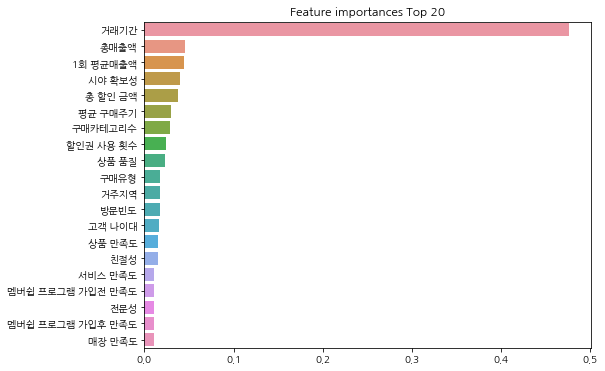

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Feature_importances_values = model2.feature_importances_
Feature_importances = pd.Series(Feature_importances_values, index = X.columns)
Feature_top20 = Feature_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = Feature_top20, y = Feature_top20.index)
plt.show()

# 회귀 실습

In [148]:
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')
df.describe()

import random

 
df['sss']= np.random.normal(25, 5, 1000)
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기,sss
0,904,0,67595760,2,85,795244,16,365400,2,4,...,4,1,4,4537,1,7,7,7,52.376471,18.949128
1,584,0,29062270,2,68,427386,13,307435,2,2,...,6,0,4,4217,1,7,6,7,61.014706,19.727437
2,709,0,28033570,2,49,572114,10,304895,2,4,...,4,0,4,4342,1,7,4,7,87.612245,20.237064
3,969,0,25952020,2,42,617905,17,363950,2,1,...,5,0,5,4602,1,7,4,7,108.571429,24.739319
4,710,0,25220240,2,105,240193,27,356700,1,1,...,4,0,2,4343,1,7,7,7,40.361905,22.081470
5,727,0,24321940,2,26,935459,27,357395,2,4,...,6,0,4,4360,1,1,2,7,166.692308,30.812320
6,713,0,22193700,2,125,177550,26,366845,2,2,...,7,0,4,4340,1,7,7,7,33.720000,29.073286
7,965,0,19678190,2,27,728822,14,333850,2,2,...,5,0,5,4598,1,7,2,7,169.296296,21.863982
8,587,0,18520640,2,59,313909,30,380250,2,2,...,4,0,5,4220,1,7,5,7,70.525424,18.653680
9,814,0,18492730,2,48,385265,19,367000,1,1,...,4,0,3,4447,1,7,4,7,91.645833,32.362982


In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('Ashopping.csv', encoding = 'cp949')


X = df.drop(['고객ID','구매카테고리수'], axis = 1)
y = df['구매카테고리수']

X_features = X.columns

select = RFE(RandomForestRegressor(n_estimators = 100, random_state = 42),
            n_features_to_select = 6)
select.fit(X,y)
X = select.transform(X)

b=select.get_support()
X_features[b]

Index(['총매출액', '방문빈도', '1회 평균매출액', '총 할인 금액', '거래기간', '평균 구매주기'], dtype='object')

In [149]:
#df =pd.read_csv('Ashopping.csv', encoding = 'cp949')

X = df[['이탈여부', '1회 평균매출액', '구매금액대', '방문빈도', '구매유형', '거래기간', '할인민감여부', '평균 구매주기']]
y=df['sss']

# 학습 데이터셋, 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [210]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
#print(X_test.shape)

In [223]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train, y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)
print(X_train.shape)

(700, 3)


# 랜덤 포레스트

In [224]:
, max_depth= 7, min_samples_leaf= 8, min_samples_split= 8,

('max_depth=', '7,', 'min_samples_leaf=', '8,', 'min_samples_split=', '8,')

In [150]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0  ,n_estimators= 100, max_depth=6 )
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [151]:
print("학습용 데이터 세트 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("평가용 데이터 세트 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터 세트 결정계수: 0.252
평가용 데이터 세트 결정계수: -0.032


# 그레디언트 부스팅

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

model2=GradientBoostingRegressor(random_state = 0, max_depth=2, )
model2.fit(X_train, y_train)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [153]:
print("학습용 데이터 세트 결정계수: {:.3f}".format(model2.score(X_train, y_train)))
print("평가용 데이터 세트 결정계수: {:.3f}".format(model2.score(X_test, y_test)))

학습용 데이터 세트 결정계수: 0.192
평가용 데이터 세트 결정계수: -0.077


In [154]:
from sklearn.metrics import mean_squared_error
from math import sqrt


y_pred = model.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, y_pred))

print("실제값의 표준편차:{:.3f}".format(y.std()))
print("RMSE:{:.3f}".format(rmse))


실제값의 표준편차:4.799
RMSE:4.997
